In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw
Processing...
Done!


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1E22B2A0198>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


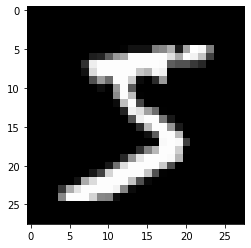

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


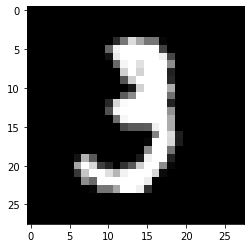

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


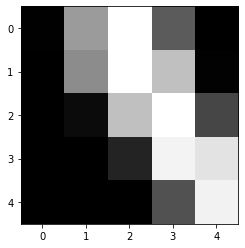

In [61]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [14]:
import numpy as np

def split_indices(n, val_pct):
    # Determine size of validation set
    n_val = int(val_pct*n)
    # Create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [15]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [16]:
print(len(train_indices), len(val_indices))
print('Sample val indices: ', val_indices[:20])

48000 12000
Sample val indices:  [ 4448 35123  9859  7693 23884 38868  4371 56325 30642 53122 14461 57027
 43175 28927 10439   992 18365 37902 49784   684]


In [17]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [18]:
batch_size=100

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, 
                          batch_size, 
                          sampler=train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size, 
                        sampler=val_sampler)

In [19]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [20]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0192, -0.0085,  0.0252,  ..., -0.0155,  0.0162,  0.0295],
        [ 0.0100,  0.0213, -0.0066,  ...,  0.0100, -0.0066, -0.0023],
        [ 0.0257, -0.0078,  0.0006,  ...,  0.0157,  0.0197,  0.0295],
        ...,
        [-0.0210, -0.0293, -0.0317,  ...,  0.0332,  0.0186,  0.0009],
        [ 0.0348, -0.0047, -0.0296,  ..., -0.0308,  0.0008, -0.0020],
        [-0.0073,  0.0040,  0.0349,  ..., -0.0154,  0.0056,  0.0123]],
       requires_grad=True)

In [21]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0333, -0.0226,  0.0345,  0.0350,  0.0245, -0.0151, -0.0314, -0.0067,
         0.0350, -0.0229], requires_grad=True)

In [22]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([8, 6, 1, 4, 6, 9, 8, 3, 0, 1, 6, 5, 2, 9, 7, 3, 3, 3, 6, 5, 7, 5, 4, 9,
        6, 9, 0, 9, 7, 4, 8, 3, 3, 4, 6, 9, 8, 9, 5, 5, 6, 9, 5, 3, 9, 2, 3, 3,
        8, 0, 8, 3, 0, 7, 8, 9, 5, 5, 2, 4, 3, 2, 9, 7, 7, 7, 0, 0, 8, 9, 4, 5,
        2, 0, 4, 0, 7, 1, 5, 3, 5, 1, 6, 1, 6, 1, 3, 8, 9, 8, 6, 9, 5, 8, 2, 8,
        8, 0, 4, 3])
torch.Size([100, 1, 28, 28])


RuntimeError: size mismatch, m1: [2800 x 28], m2: [784 x 10] at C:\w\1\s\tmp_conda_3.7_100118\conda\conda-bld\pytorch_1579082551706\work\aten\src\TH/generic/THTensorMath.cpp:136

In [24]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [25]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0292,  0.0020,  0.0205,  ..., -0.0079, -0.0064,  0.0005],
         [-0.0249,  0.0164, -0.0357,  ..., -0.0238,  0.0059,  0.0120],
         [-0.0312, -0.0116, -0.0131,  ...,  0.0261,  0.0215,  0.0328],
         ...,
         [ 0.0309,  0.0167, -0.0135,  ..., -0.0044, -0.0062, -0.0087],
         [-0.0191, -0.0100, -0.0174,  ..., -0.0352,  0.0273,  0.0082],
         [-0.0354,  0.0227, -0.0176,  ..., -0.0136, -0.0105, -0.0058]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0110, -0.0142, -0.0116, -0.0037, -0.0066, -0.0343, -0.0197, -0.0316,
         -0.0168, -0.0140], requires_grad=True)]

In [26]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[-0.0438,  0.2561,  0.3015, -0.4104, -0.1883, -0.0550,  0.1031,  0.1005,
          0.1813, -0.3189],
        [-0.0767,  0.2377, -0.0060, -0.2154,  0.1144, -0.3174,  0.1063, -0.1601,
         -0.3424, -0.0386]])


In [27]:
import torch.nn.functional as F

In [28]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0940, 0.1269, 0.1328, 0.0652, 0.0814, 0.0930, 0.1089, 0.1086, 0.1178,
         0.0714],
        [0.0977, 0.1338, 0.1049, 0.0850, 0.1183, 0.0768, 0.1173, 0.0899, 0.0749,
         0.1015]])
Sum:  1.0


In [29]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([2, 1, 1, 1, 4, 1, 9, 1, 4, 1, 0, 4, 5, 1, 9, 4, 4, 1, 8, 1, 4, 1, 1, 9,
        4, 4, 0, 7, 1, 4, 1, 4, 4, 1, 1, 1, 4, 2, 1, 4, 4, 4, 4, 1, 4, 4, 7, 4,
        1, 1, 4, 4, 4, 5, 1, 4, 4, 1, 1, 4, 4, 5, 4, 2, 1, 1, 4, 4, 4, 1, 4, 4,
        1, 4, 4, 1, 2, 1, 0, 4, 1, 2, 1, 1, 6, 2, 1, 4, 1, 4, 1, 1, 2, 4, 8, 1,
        1, 4, 7, 4])
tensor([0.1328, 0.1338, 0.1224, 0.1151, 0.1259, 0.1490, 0.1197, 0.1190, 0.1403,
        0.1549, 0.1133, 0.1249, 0.1191, 0.1466, 0.1192, 0.1230, 0.1310, 0.1379,
        0.1204, 0.1244, 0.1271, 0.1306, 0.1466, 0.1297, 0.1425, 0.1214, 0.1109,
        0.1207, 0.1298, 0.1252, 0.1250, 0.1206, 0.1223, 0.1228, 0.1187, 0.1375,
        0.1349, 0.1241, 0.1272, 0.1344, 0.1432, 0.1543, 0.1337, 0.1563, 0.1145,
        0.1317, 0.1140, 0.1175, 0.1803, 0.1393, 0.1323, 0.1316, 0.1312, 0.1267,
        0.1328, 0.1209, 0.1284, 0.1580, 0.1206, 0.1216, 0.1585, 0.1216, 0.1157,
        0.1389, 0.1305, 0.1322, 0.1209, 0.1399, 0.1213, 0.1237, 0.1157, 0.1159,
        0.1337, 0.1

In [30]:
labels

tensor([0, 2, 3, 1, 9, 9, 5, 9, 3, 4, 1, 8, 8, 0, 7, 9, 6, 4, 4, 9, 5, 6, 4, 6,
        9, 4, 5, 2, 4, 9, 3, 2, 8, 4, 5, 8, 0, 8, 4, 3, 7, 5, 3, 0, 5, 8, 2, 3,
        4, 5, 1, 3, 2, 1, 4, 7, 1, 2, 4, 2, 2, 5, 5, 3, 4, 8, 7, 2, 7, 9, 9, 8,
        0, 6, 1, 4, 8, 0, 3, 3, 0, 3, 5, 3, 0, 3, 4, 8, 5, 3, 9, 8, 3, 1, 8, 0,
        6, 4, 0, 6])

In [31]:
def accuracy(l1, l2):
    return torch.sum(l1 == l2).item() / len(l1)

In [32]:
accuracy(preds, labels)

0.05

In [33]:
loss_fn = F.cross_entropy

In [34]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3452, grad_fn=<NllLossBackward>)


In [35]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [36]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    # Calculate loss
    preds = model(xb)
    loss = loss_func(preds, yb)
                     
    if opt is not None:
        # Compute gradients
        loss.backward()
        # Update parameters             
        opt.step()
        # Reset gradients
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        # Compute the metric
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result

In [37]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                   for xb,yb in valid_dl]
        # Separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        # Total size of the dataset
        total = np.sum(nums)
        # Avg. loss across batches 
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            # Avg. of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [38]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [39]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3400, Accuracy: 0.0565


In [40]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        # Training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

        # Evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        # Print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                  .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [41]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [42]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.8859, accuracy: 0.6627
Epoch [2/5], Loss: 1.5831, accuracy: 0.7476
Epoch [3/5], Loss: 1.3701, accuracy: 0.7788
Epoch [4/5], Loss: 1.2168, accuracy: 0.7996
Epoch [5/5], Loss: 1.1028, accuracy: 0.8130


In [43]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.0157, accuracy: 0.8213
Epoch [2/5], Loss: 0.9470, accuracy: 0.8291
Epoch [3/5], Loss: 0.8917, accuracy: 0.8340
Epoch [4/5], Loss: 0.8461, accuracy: 0.8373
Epoch [5/5], Loss: 0.8078, accuracy: 0.8414


In [44]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.7752, accuracy: 0.8451
Epoch [2/5], Loss: 0.7472, accuracy: 0.8482
Epoch [3/5], Loss: 0.7228, accuracy: 0.8502
Epoch [4/5], Loss: 0.7012, accuracy: 0.8518
Epoch [5/5], Loss: 0.6820, accuracy: 0.8536


In [45]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.6649, accuracy: 0.8554
Epoch [2/5], Loss: 0.6495, accuracy: 0.8579
Epoch [3/5], Loss: 0.6355, accuracy: 0.8593
Epoch [4/5], Loss: 0.6228, accuracy: 0.8613
Epoch [5/5], Loss: 0.6112, accuracy: 0.8627


In [46]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.6005, accuracy: 0.8645
Epoch [2/5], Loss: 0.5906, accuracy: 0.8655
Epoch [3/5], Loss: 0.5814, accuracy: 0.8661
Epoch [4/5], Loss: 0.5729, accuracy: 0.8668
Epoch [5/5], Loss: 0.5649, accuracy: 0.8679


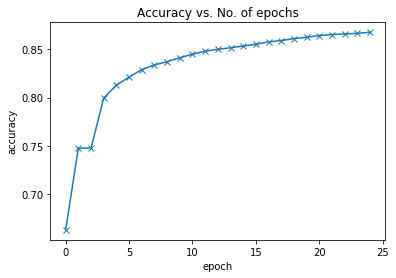

In [47]:
accuracies = [0.6627, 0.7476, 0.7476, 0.7996, 0.8130, 0.8213,
              0.8291, 0.8340, 0.8373, 0.8414, 0.8451, 
              0.8482, 0.8502, 0.8518, 0.8536, 0.8554,
              0.8579, 0.8593, 0.8613, 0.8627, 0.8645,
             0.8655,0.8661,0.8668,0.8679]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [48]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


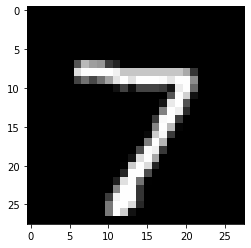

In [49]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [50]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [51]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


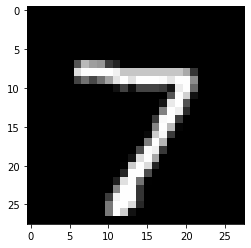

In [52]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


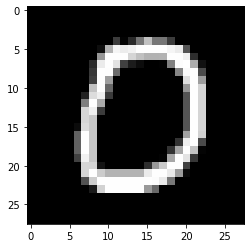

In [53]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


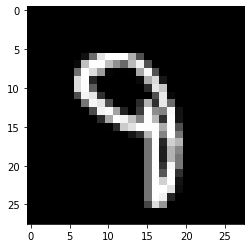

In [54]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


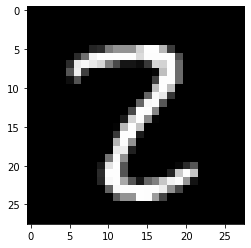

In [55]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [56]:
test_loader = DataLoader(test_dataset, batch_size=200)

test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.5493, Accuracy: 0.8751


In [57]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [58]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0356, -0.0135, -0.0344,  ...,  0.0176,  0.0163, -0.0039],
                      [ 0.0185,  0.0091,  0.0047,  ...,  0.0128, -0.0354, -0.0334],
                      [-0.0182,  0.0222, -0.0133,  ..., -0.0241, -0.0292, -0.0142],
                      ...,
                      [ 0.0104, -0.0091, -0.0093,  ..., -0.0307,  0.0309,  0.0274],
                      [-0.0324, -0.0120,  0.0163,  ..., -0.0229, -0.0015,  0.0335],
                      [-0.0022,  0.0003,  0.0340,  ..., -0.0291, -0.0039, -0.0293]])),
             ('linear.bias',
              tensor([-0.0669,  0.1369, -0.0614, -0.0308,  0.0230,  0.0824, -0.0059,  0.0936,
                      -0.1521, -0.0320]))])

In [59]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0356, -0.0135, -0.0344,  ...,  0.0176,  0.0163, -0.0039],
                      [ 0.0185,  0.0091,  0.0047,  ...,  0.0128, -0.0354, -0.0334],
                      [-0.0182,  0.0222, -0.0133,  ..., -0.0241, -0.0292, -0.0142],
                      ...,
                      [ 0.0104, -0.0091, -0.0093,  ..., -0.0307,  0.0309,  0.0274],
                      [-0.0324, -0.0120,  0.0163,  ..., -0.0229, -0.0015,  0.0335],
                      [-0.0022,  0.0003,  0.0340,  ..., -0.0291, -0.0039, -0.0293]])),
             ('linear.bias',
              tensor([-0.0669,  0.1369, -0.0614, -0.0308,  0.0230,  0.0824, -0.0059,  0.0936,
                      -0.1521, -0.0320]))])

In [60]:
test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.5493, Accuracy: 0.8751
